### 1. Exploratory Data Analysis
### 2. Preprocessing
### 3. Model Building
### 4. Evaluation

In [43]:
import pandas as pd
import warnings 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Machine_Learning_G6/refs/heads/main/Dataset/4.%20WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
### Target prediction: Customer Churn
### Data Collection: 

#### Exploratory Data Analysis

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df['Churn'].dtype

dtype('O')

In [115]:
categorical = []
numerical = []
drop_columns = ['TotalCharges', 'customerID']
target = 'Churn'
for column in df.columns:
    if column in drop_columns:
        continue
    elif column ==target:
        continue
    elif df[column].dtype =='O': 
        categorical.append(column)
    else:
        numerical.append(column)


In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [121]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


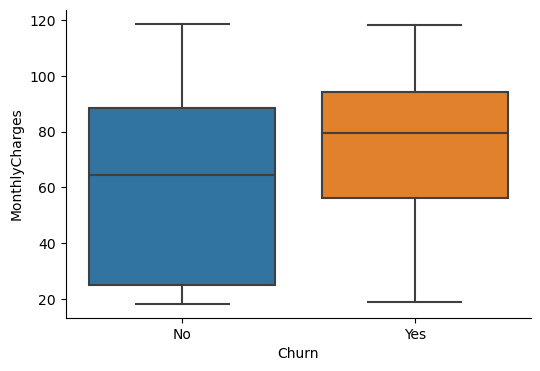

In [123]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.boxplot(y= df['MonthlyCharges'], x = df['Churn'])
sns.despine();

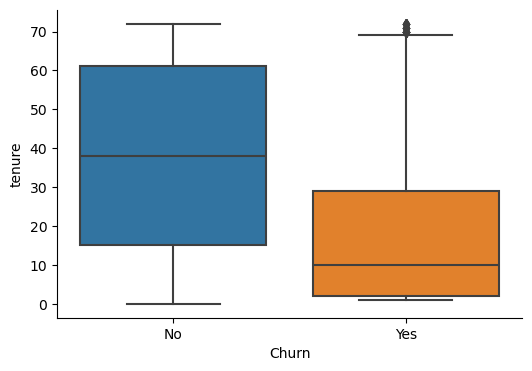

In [125]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.boxplot(y= df['tenure'], x = df['Churn'])
sns.despine();

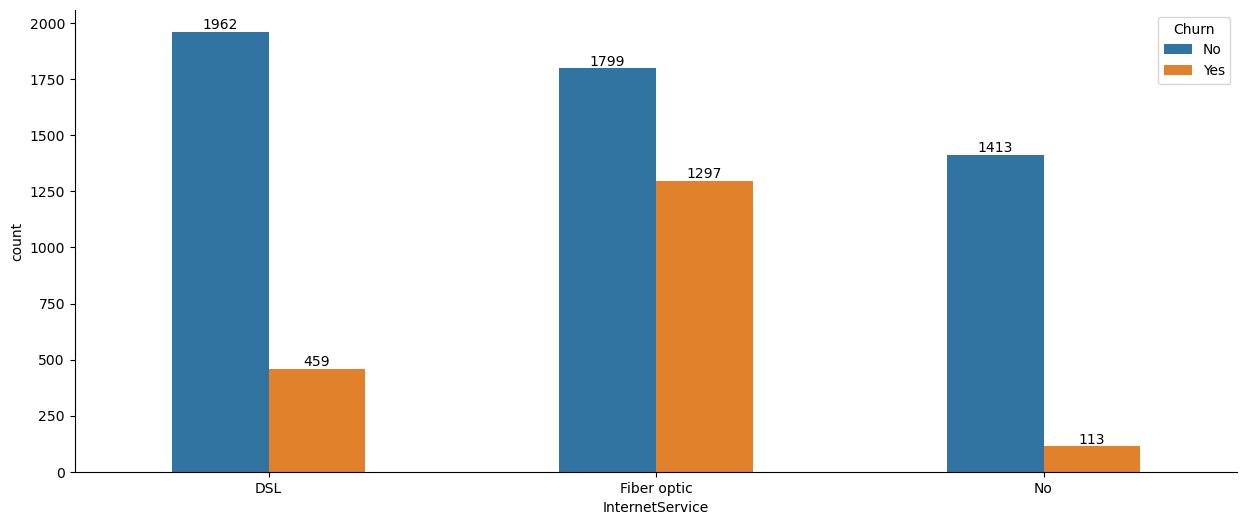

In [127]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = df['InternetService'], hue = df['Churn'], width= 0.5)
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
sns.despine()

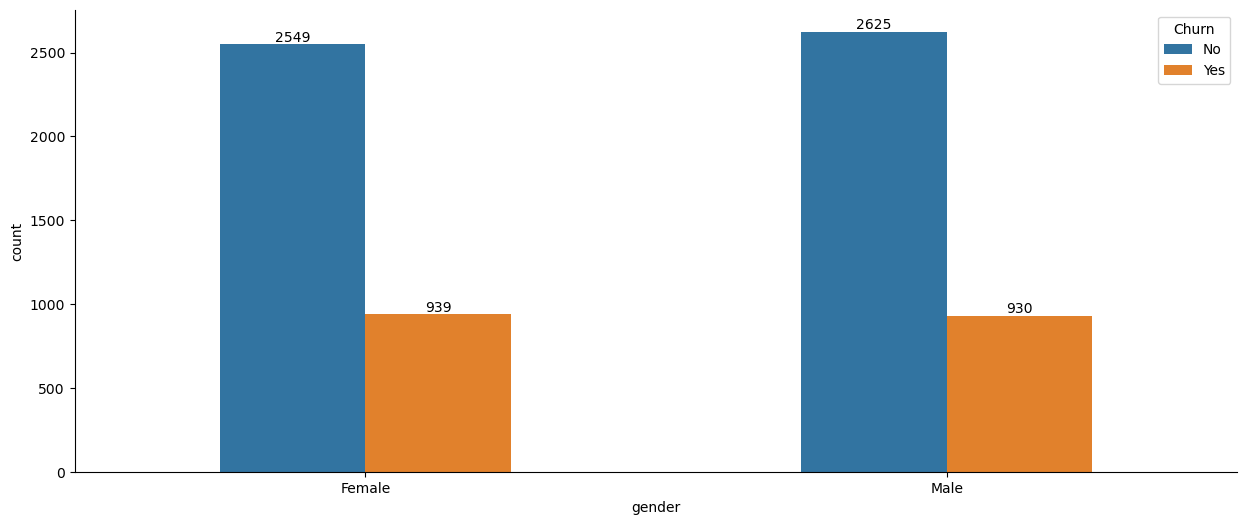

In [129]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = df['gender'], hue = df['Churn'], width= 0.5)
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
sns.despine()

In [131]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Preprocessing Pipeline

In [134]:
def drop_column(x):
    return x.drop(columns = drop_columns)

In [136]:
preprocessor = ColumnTransformer([
    ('scaling', StandardScaler(), numerical),
    ('onehot', OneHotEncoder(), categorical)
])

In [138]:
preprocessor.fit_transform(df)

array([[-0.43991649, -1.27744458, -1.16032292, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43991649,  0.06632742, -0.25962894, ...,  0.        ,
         0.        ,  1.        ],
       [-0.43991649, -1.23672422, -0.36266036, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.27315869, -1.15528349,  0.32033821, ...,  0.        ,
         0.        ,  1.        ],
       [-0.43991649,  1.36937906,  1.35896134, ...,  0.        ,
         0.        ,  0.        ]])

In [140]:
### Model building with preprocessing

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [150]:
traning_pipeline = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('prepressing', preprocessor),
    ('Model', LogisticRegression())
])

In [148]:
x = df.drop(columns=target)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [152]:
traning_pipeline.fit(x_train, y_train)

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_column at 0x3329acc20>)),
                ('prepressing',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('Model', LogisticRegression())])

#### Model Evaluation

In [157]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(y_test, traning_pipeline.predict(x_test))

array([[1170,  128],
       [ 203,  260]])

In [161]:
(1170 + 260)/(1170 + 128 + 203 + 260)

0.8120386144236229